# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

- CustomerId: Customer ID
- Gender: Gender
- SeniorCitizen: Whether the customer is elderly (1, 0)
- Partner: Whether the client has a partner (Yes, No)
- Dependents: Whether the client has dependents (Yes, No)
- tenure: Number of months the client stays with the company
- PhoneService: Whether the customer has telephone service (Yes, No)
- MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
- InternetService: Customer's internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security (Yes, No, No internet service)
- OnlineBackup: Whether the customer has an online backup (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection (Yes, No, No internet service)
- TechSupport: Whether the customer receives technical support (Yes, No, No internet service)
- StreamingTV: Whether the customer has a TV broadcast (Yes, No, No internet service)
- StreamingMovies: Whether the customer has movie streaming (Yes, No, No internet service)
- Contract: Client's contract duration (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has a paperless invoice (Yes, No)
- PaymentMethod: Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: Amount collected from the customer on a monthly basis
- TotalCharges: Total amount collected from the customer
- Churn: indicates if the customer has left the service (Yes) or not (No).

In [2]:
df = pd.read_csv("Churn.csv")
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


Observation:

- The information above shows that there are 7046 rows of data with a total of 12 columns
- The value of the column matches its data type
- There are several columns that have null values ​​when viewed from the Non-Null Count

# Cleaning Data

## Check Missing Value

In [4]:
# check missing value in percent from all column 
((df.shape[0] - df.dropna().shape[0]) / df.shape[0])*100

1.9159806982685212

In [5]:
# check missing value
df.isna().sum()

customerID           9
Gender              16
SeniorCitizen       12
Partner             16
Dependents          19
Tenure              17
Contract            13
PaperlessBilling    13
PaymentMethod       11
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64

In [6]:
# Check missing values in percentage and sort from largest to smallest.
missing_val =  (df.isnull().sum()/1460)*100
missing_val = pd.Series(missing_val, index=df.columns)
missing_val.sort_values(ascending=False, inplace=True)
print(missing_val[0:20])

Dependents          1.301370
Tenure              1.164384
Gender              1.095890
Partner             1.095890
Contract            0.890411
PaperlessBilling    0.890411
SeniorCitizen       0.821918
PaymentMethod       0.753425
MonthlyCharges      0.684932
customerID          0.616438
TotalCharges        0.000000
Churn               0.000000
dtype: float64


Observation:

- From the total dataset columns, 1.9%
- Viewed from each column, the largest missing value is 1.3%
- Because it is still relatively small, it is better to drop it

## Handling Missing Value

In [7]:
df = df.dropna()

In [8]:
# double check
df.isnull().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Check Data Duplication

In [9]:
df.duplicated().sum()

13

In [10]:
df[df.duplicated(keep = False)].sort_values('Tenure').head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6567,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.2,No
3314,3866-MDTUB,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.75,146.9,Yes
7042,3866-MDTUB,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.75,146.9,Yes
7040,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.2,No
7032,2905-KFQUV,Female,0.0,Yes,No,2.0,Month-to-month,Yes,Credit card (automatic),70.40,154.8,No


Observation:

- There are 13 duplicate rows
- If the duplication is in the ID then it is a duplication but if the duplication is not in the ID/PK or does not even have a PK then it is not a duplication.
- Because the duplication has an ID/PK, we drop it.

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
df['Churn'] = le.fit_transform(df.Churn.values)

# No = 0
# Yes = 1

In [14]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,1


# EDA

In [15]:
# separate the data based on objects and numerics
df_numerical_features = df.select_dtypes(exclude='object')
df_categorical_features = df.select_dtypes(include='object')

In [16]:
# statistic descriptive category
df_categorical_features.describe()

,customerID,Gender,Partner,Dependents,Contract,PaperlessBilling,PaymentMethod
count,6898,6898,6898,6898,6898,6898,6898
unique,6898,2,2,2,3,2,4
top,5575-GNVDE,Male,No,No,Month-to-month,Yes,Electronic check
freq,1,3488,3573,4845,3803,4088,2309


In [17]:
# statistic descriptive numeric
df_numerical_features.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn
count,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000
mean,0.161931,32.433749,64.839439,2286.277320,0.264569
std,0.368414,24.528786,30.100388,2265.938904,0.441136
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.550000,401.150000,0.000000
50%,0.000000,29.000000,70.400000,1400.700000,0.000000
75%,0.000000,55.000000,89.900000,3807.837500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


Observation:

- We ignore those with discrete numbers. Focus on columns with continuous numbers
- The tenure column with TotalCharge has a positive skewed where the mean is greater than the median (50%) and for MonthlyCharge it has a negative skewed because the mean is smaller than the median (50%)

## Outlier check

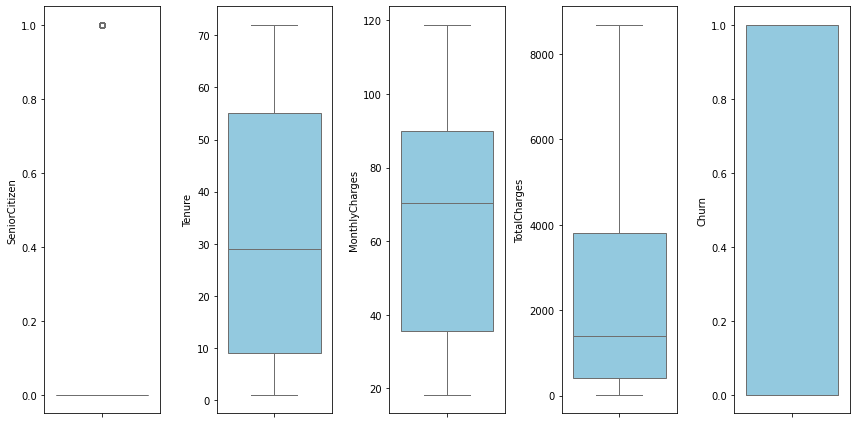

In [18]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = df_numerical_features.columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()
plt.show()

Observations:

- SeniorCitizen and Churn do not display boxplots because they are discrete numbers.
- Tenure has a median of around 30 months where half of customers use the service for 30 months with a flat distribution and most customers use the service for 20 to 50 months.
- MonthlyCharges has a fairly high media of around 70 per month with a symmetrical distribution and the majority of customers pay around 35 to 80 for services.
- TotalCharges has a median of around 1500 - 1600 where half of the total customers pay below this value with a positive skewed distribution where customers with longer tenure have high TotalCharges and have varying total charges of around 200 to almost 4000 due to differences in service packages and duration.

## Univariate Analysis

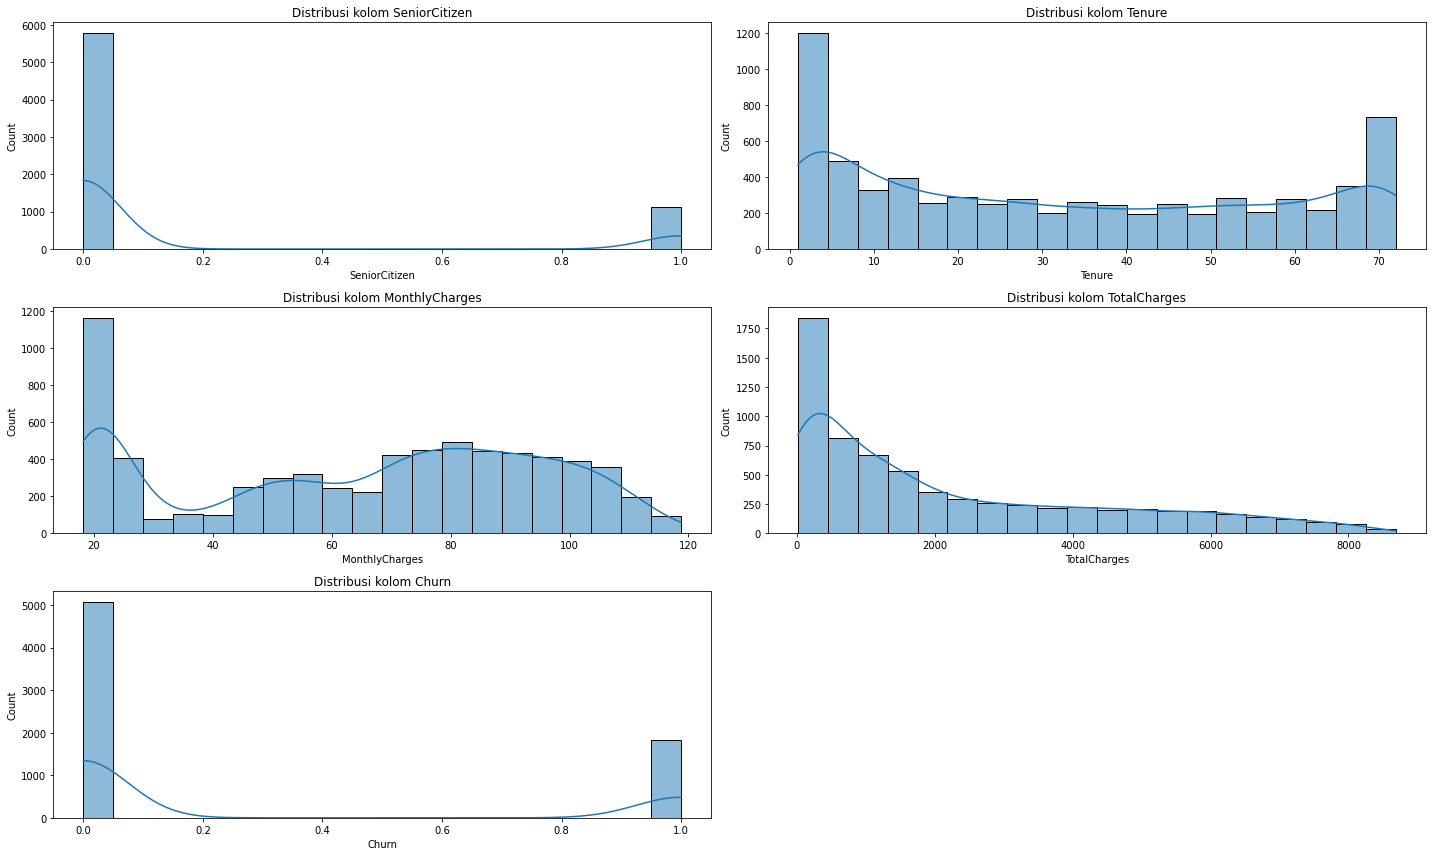

In [19]:
# Check the frequency distribution of data for each column
plt.figure(1, figsize = (20,12))
n = 0
plot_kolom = df_numerical_features.columns

jumlah_kolom = 2

for x in plot_kolom :
    n += 1
    plt.subplot(len(plot_kolom)  // jumlah_kolom + 1, jumlah_kolom, n)
    sns.histplot(df[x], bins = 20, kde = True)
    plt.title("Distribusi kolom {}".format(x))
plt.tight_layout()
plt.show()

Observation:

- There are no outliers from each column
- Tenure at the beginning has a decrease that is not significant enough and at the end many customers even subscribe for up to 70 months
- MonthlyCharges has a decrease at the beginning but in the middle there is an increase which indicates that many customers make more monthly payments, namely 50-80
- TotalCharges has a decrease on the graph which is in line with tenure/month subscription, namely the longer the customer subscribes, the higher the total billing.

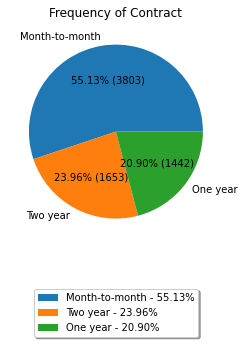

In [20]:
values = df['Contract'].value_counts()
plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
plt.title("Frequency of " + 'Contract')
plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)

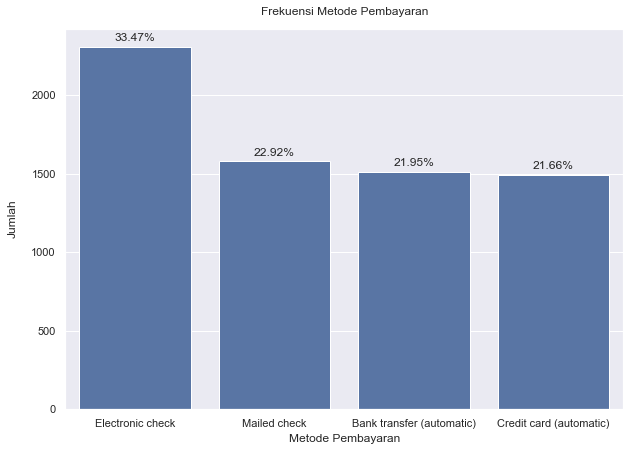

In [21]:
counts = df['PaymentMethod'].value_counts().sort_values(ascending = False)
ratios = 100*counts/len(df)

# Sort Payment Method by counts
sorted_paymentmethod = counts.index

# Create font and figure scale
sns.set(font_scale = 1.0)
plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df['PaymentMethod'], data=df, order = sorted_paymentmethod)
plt.xlabel('Metode Pembayaran', labelpad=5)
plt.ylabel('Jumlah', labelpad=14)
plt.title('Frekuensi Metode Pembayaran', y=1.02)

for i, p in enumerate(ax.patches):
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 0.01*max(counts),
                f'{ratios[i]:.2f}%',
                ha="center", va="bottom")

## Bivariate Analysis

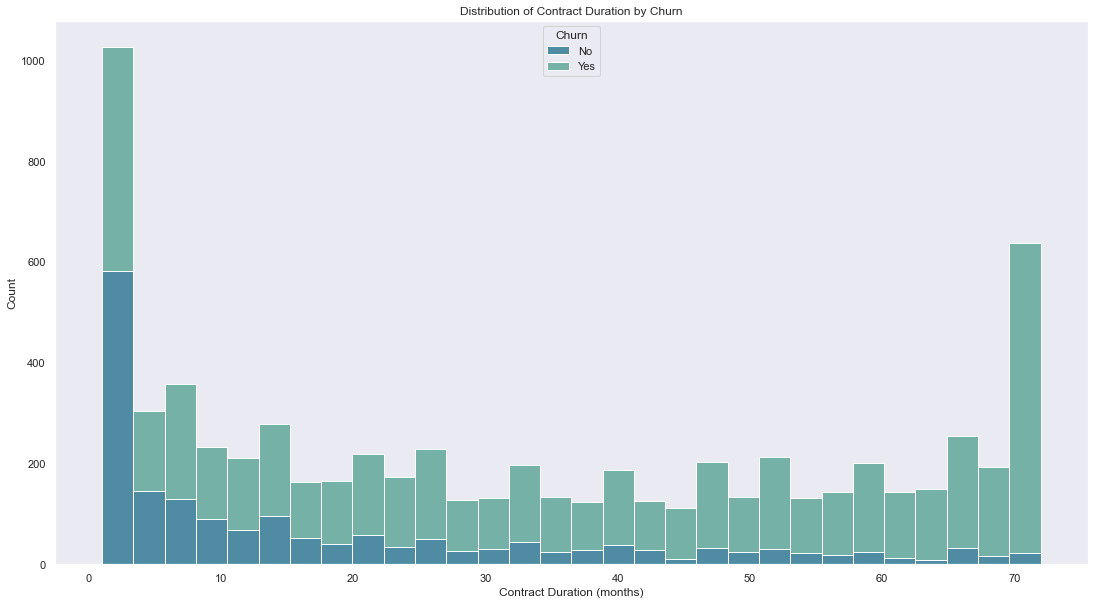

<Figure size 1332x720 with 0 Axes>

<Figure size 1332x720 with 0 Axes>

In [22]:
# Tenure distribution based on churn
plt.figure(figsize=(18.5, 10))
sns.histplot(data=df, x='Tenure', hue='Churn', multiple='stack', palette='crest', bins=30) 
#bins : to arrange 30 cuttings/stems
#multiple : stack histograms based on churn status
plt.title('Distribution of Contract Duration by Churn')
plt.xlabel('Contract Duration (months)')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper center', labels=['No', 'Yes'])
plt.grid(False)
plt.show()

plt.figure(figsize=(18.5, 10))

# Encode Data

In [23]:
new_df = df.copy()

In [24]:
class_contract = {
    'Month-to-month' : 0,
    'One year' : 1,
    'Two year' : 2,
}

new_df['class_contract'] = new_df['Contract'].map(class_contract)

In [25]:
class_payment = {
    'Electronic check' : 0,
    'Mailed check' : 1,
    'Bank transfer (automatic)' : 2,
    'Credit card (automatic)' : 3,
}   

new_df['class_payment'] = new_df['PaymentMethod'].map(class_payment)

In [26]:
from sklearn.preprocessing import LabelEncoder 

#Create label encoder
Label_encoder = LabelEncoder()
data_kol = new_df.select_dtypes(include = ['object']).columns
label_kol = list(data_kol)

#Process encoder
new_df[label_kol] = new_df[label_kol].apply(lambda col:Label_encoder.fit_transform(col))

new_df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class_contract,class_payment
1,3879,1,0.0,0,0,34.0,1,0,3,56.95,1889.50,0,1,1
2,2512,1,0.0,0,0,2.0,0,1,3,53.85,108.15,1,0,1
3,5420,1,0.0,0,0,45.0,1,0,0,42.30,1840.75,0,1,2
4,6377,0,0.0,0,0,2.0,0,1,2,70.70,151.65,1,0,0
5,6417,0,0.0,0,0,8.0,0,1,2,99.65,820.50,1,0,0


## Multivariate Analysis

In [27]:
new_data = new_df[["Tenure", "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn"]]

In [28]:
new_data.head()

,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,34.0,1,0,3,56.95,1889.50,0
2,2.0,0,1,3,53.85,108.15,1
3,45.0,1,0,0,42.30,1840.75,0
4,2.0,0,1,2,70.70,151.65,1
5,8.0,0,1,2,99.65,820.50,1


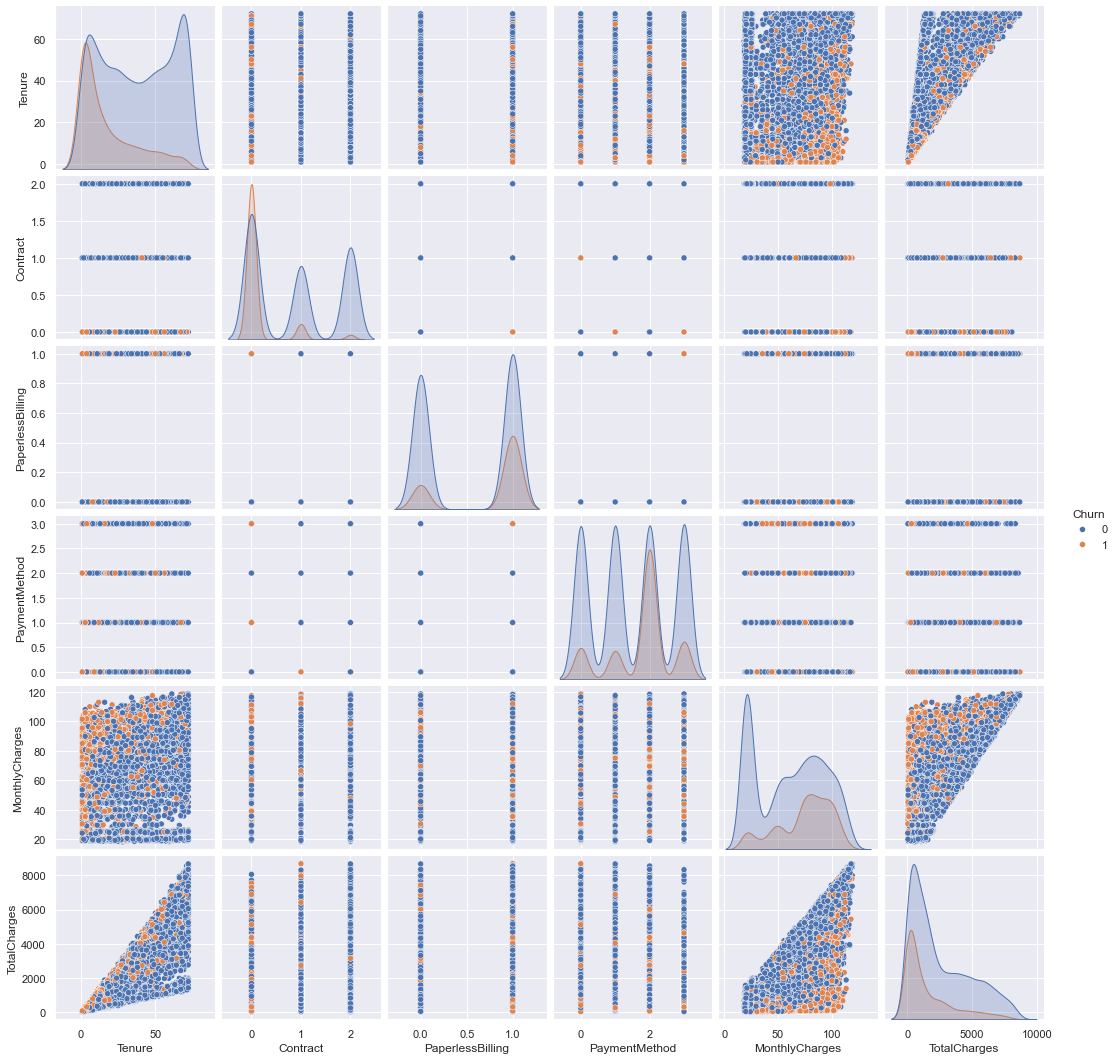

In [29]:
# pairplot of the data
sns.pairplot(new_data, hue='Churn')

Observation:

- Churned customers have lower total charges and monthly charges than non-churners
- Churned customers use month-to-month / 0 contracts compared to annual contracts.

# Deep Exploration

#### 1. 10 customers who spend the most and use the service the longest (most loyal customers)

In [30]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,1


In [31]:
top10_cust = (df.groupby('customerID')
              .agg(total_spend = ('TotalCharges', 'sum'))
              .reset_index()
              .sort_values('total_spend', ascending = False)
              .head(10)
             )
top10_cust

,customerID,total_spend
1963,2889-FPWRM,8684.80
5253,7569-NMZYQ,8672.45
6714,9739-JLPQJ,8670.10
6749,9788-HNGUT,8594.40
6145,8879-XUAHX,8564.75
6848,9924-JPRMC,8547.15
446,0675-NCDYU,8543.25
4620,6650-BWFRT,8529.50
92,0164-APGRB,8496.70
1007,1488-PBLJN,8477.70


#### 2. Payment type and best payment type

In [32]:
Gender_group = (df.groupby(['Gender', 'customerID'])
              .agg(total_spend = ('TotalCharges', 'sum'),
                  long_service = ('Tenure', 'sum'))
              .reset_index()
              .sort_values('total_spend', ascending = False)
             )
Gender_group.head(10)

,Gender,customerID,total_spend,long_service
4383,Male,2889-FPWRM,8684.80,72.0
2586,Female,7569-NMZYQ,8672.45,72.0
3312,Female,9739-JLPQJ,8670.10,72.0
6826,Male,9788-HNGUT,8594.40,72.0
6535,Male,8879-XUAHX,8564.75,71.0
6871,Male,9924-JPRMC,8547.15,72.0
226,Female,0675-NCDYU,8543.25,72.0
2290,Female,6650-BWFRT,8529.50,72.0
49,Female,0164-APGRB,8496.70,72.0
500,Female,1488-PBLJN,8477.70,72.0


In [33]:
PaymentMethod_user = (df.groupby(['PaymentMethod', 'customerID'])
              .agg(total_spend = ('TotalCharges', 'sum'),
                  long_service = ('Tenure', 'sum'))
              .reset_index()
              .sort_values('total_spend', ascending = False)
             )
PaymentMethod_user.head(10)

,PaymentMethod,customerID,total_spend,long_service
450,Bank transfer (automatic),2889-FPWRM,8684.80,72.0
1170,Bank transfer (automatic),7569-NMZYQ,8672.45,72.0
2970,Credit card (automatic),9739-JLPQJ,8670.10,72.0
2976,Credit card (automatic),9788-HNGUT,8594.40,72.0
5069,Electronic check,8879-XUAHX,8564.75,71.0
5303,Electronic check,9924-JPRMC,8547.15,72.0
1602,Credit card (automatic),0675-NCDYU,8543.25,72.0
2511,Credit card (automatic),6650-BWFRT,8529.50,72.0
3043,Electronic check,0164-APGRB,8496.70,72.0
244,Bank transfer (automatic),1488-PBLJN,8477.70,72.0


In [34]:
PaymentMethod_user.PaymentMethod.value_counts()

Electronic check             2309
Mailed check                 1581
Bank transfer (automatic)    1514
Credit card (automatic)      1494
Name: PaymentMethod, dtype: int64

<AxesSubplot:xlabel='PaymentMethod', ylabel='total_spend'>

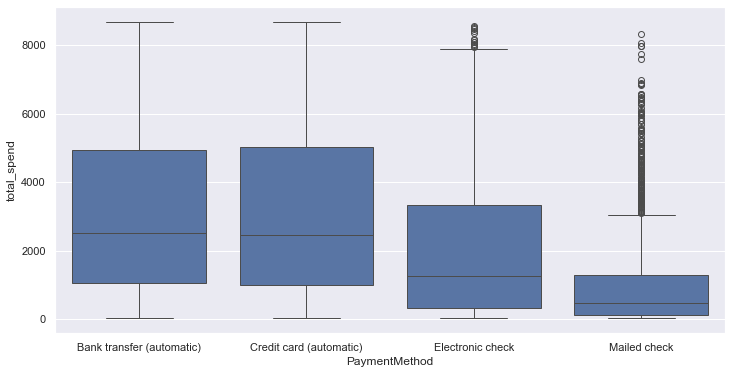

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=PaymentMethod_user,
            x='PaymentMethod',
            y='total_spend')

Payment performance with credit cards is better because the Q3 range is larger

#### 3. Average customer spend based on gender and contract

In [36]:
pivot = df.groupby(['Gender', 'Contract']).agg(
    median_spend = ('TotalCharges', 'median')
).reset_index()
pivot

,Gender,Contract,median_spend
0,Female,Month-to-month,679.800
1,Female,One year,2889.325
2,Female,Two year,3533.600
3,Male,Month-to-month,684.850
4,Male,One year,2564.125
5,Male,Two year,3753.200


In [37]:
df_pivot = pd.pivot_table(pivot,
                         index = 'Gender',
                         columns = 'Contract')
df_pivot.columns = [str(j) for j in df_pivot.columns.get_level_values(1)]
data_pivot = df_pivot.reset_index()
data_pivot

,Gender,Month-to-month,One year,Two year
0,Female,679.80,2889.325,3533.6
1,Male,684.85,2564.125,3753.2


The average spend billing for both men and women has a slight difference and women have more spend bills than men, although the difference is only slight.